In [1]:
import bs4 as bs
import urllib.request
import pandas as pd
import requests
import numpy as np
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt  

In [2]:
url = 'https://www.goiko.com/todos-nuestros-restaurantes/'
source = urllib.request.urlopen(url).read()
soup = bs.BeautifulSoup(source,'html.parser')

In [3]:
headers = soup.find_all('div', attrs={'class':'locationGroup'})

In [4]:
l = []
for tr in headers:
    td = tr.find_all('h2', attrs={'class':'city'})
    ts = tr.find_all('h3')
    col1 = [tr.text for tr in td]
    col2 =[tr.text for tr in ts]
    for a in col1:
        col1_1 = ''.join(a)
    for a in col2:
        col2_2 = ''.join(a)
    l.append([col1_1, col2_2])
df = pd.DataFrame(l, columns=["City", "Location"])
df.head()

,City,Location
0,Madrid,"María de Molina 20, Madrid"
1,Valencia,"Martínez Cubells 4, Valencia"
2,Zaragoza,"San Miguel 7, Zaragoza"
3,Alicante,"Pablo Iglesias 5, Alicante"
4,Barcelona,"Sant Joan 58, Barcelona"


In [5]:
# de mejoria habria que ver como hacer para q

In [6]:
d = {'latitude': [40.437680, 39.468176, 41.651058, 38.347451, 41.396366, 37.378055, 37.989098, 36.718198, 36.841152, 40.965090, 43.462878, 37.888333, 42.238511, 42.597248, 41.650895, 43.361805, 43.264889, 42.343566, \
                 42.815348, 38.991314, 43.344640, 42.843170, 41.161671, 41.547640, 39.983450, 37.625753, 41.562690, 42.874493, 41.471087, 37.768341, 36.509986, 36.532785, 42.464222, 41.448458, 41.540790, 43.318903], \
    'longitude': [-3.686744, -0.374816, -0.880645, -0.488203, 2.174007, -6.002107, -1.130234, -4.428929, -2.462713, -5.661362, -3.808549, -4.782235, -8.718986, -5.571766, -4.726638, -5.847087, -2.942169, -3.700690, \
                 -1.646541, -1.858601, -8.428784, -2.670777, 1.109997, 2.109770, -0.032377, -0.949227, 2.009384, -8.548971, 2.089763, -3.787204, -4.888791, -6.297118, -2.447446, 2.249067, 2.444151, -1.980295]}
df1 = pd.DataFrame(data=d)

In [7]:
df['Latitude'] = df1['latitude']
df['Longitude'] = df1['longitude']
df.head()

,City,Location,Latitude,Longitude
0,Madrid,"María de Molina 20, Madrid",40.437680,-3.686744
1,Valencia,"Martínez Cubells 4, Valencia",39.468176,-0.374816
2,Zaragoza,"San Miguel 7, Zaragoza",41.651058,-0.880645
3,Alicante,"Pablo Iglesias 5, Alicante",38.347451,-0.488203
4,Barcelona,"Sant Joan 58, Barcelona",41.396366,2.174007


In [8]:
CLIENT_ID = 'IFXVAU2BXOUYYCTM2QBV4SH1LAXR0PKGSFGF22SAFQT33JUQ' # your Foursquare ID
CLIENT_SECRET = 'ANLNTXSSZNSEZSRJ2GTM5RITZXS1G3PUALPZKFCEV2NBT4SM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 200 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IFXVAU2BXOUYYCTM2QBV4SH1LAXR0PKGSFGF22SAFQT33JUQ
CLIENT_SECRET:ANLNTXSSZNSEZSRJ2GTM5RITZXS1G3PUALPZKFCEV2NBT4SM


In [9]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=400):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
spain_venues = getNearbyVenues(names=df['City'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'])

Madrid
Valencia
Zaragoza
Alicante
Barcelona
Sevilla
Murcia
Málaga
Almería
Salamanca
Santander
Córdoba
Vigo
León
Valladolid
Oviedo
Bilbao
Burgos
Pamplona
Albacete
Coruña
Vitoria
Tarragona
Sabadell
Castellón
Cartagena
Terrassa
Santiago de Compostela
Sant Cugat del Vallès
Jaén
Marbella
Cádiz
Logroño
Badalona
Mataró
San Sebastián


In [12]:
print(spain_venues.shape)
spain_venues.head()

(2099, 7)


,City,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Madrid,40.43768,-3.686744,Religion Coffee,40.437733,-3.685164,Coffee Shop
1,Madrid,40.43768,-3.686744,Tierra Burrito Bar,40.437721,-3.686372,Burrito Place
2,Madrid,40.43768,-3.686744,Hevia,40.436109,-3.686459,Spanish Restaurant
3,Madrid,40.43768,-3.686744,Beker 6,40.436074,-3.687277,Restaurant
4,Madrid,40.43768,-3.686744,Ronda 14,40.436271,-3.684601,Japanese Restaurant


In [13]:
spain_venues.groupby('City').count()

,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Albacete,26,26,26,26,26,26
Alicante,91,91,91,91,91,91
Almería,62,62,62,62,62,62
Badalona,85,85,85,85,85,85
Barcelona,61,61,61,61,61,61
Bilbao,64,64,64,64,64,64
Burgos,79,79,79,79,79,79
Cartagena,25,25,25,25,25,25
Castellón,30,30,30,30,30,30


In [14]:
# one hot encoding
spain_onehot = pd.get_dummies(spain_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
spain_onehot['City'] = spain_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [spain_onehot.columns[-1]] + list(spain_onehot.columns[:-1])
spain_onehot = spain_onehot[fixed_columns]

spain_onehot.head()

,City,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Auditorium,BBQ Joint,Bagel Shop,Bakery,...,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Warehouse Store,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,Madrid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Madrid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Madrid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Madrid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Madrid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
spain_grouped = spain_onehot.groupby('City').mean().reset_index()
spain_grouped.head()

,City,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Auditorium,BBQ Joint,Bagel Shop,Bakery,...,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Warehouse Store,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,Albacete,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,Alicante,0.010989,0.000000,0.0,0.010989,0.00000,0.0,0.000000,0.0,0.010989,...,0.0,0.0,0.0,0.010989,0.010989,0.0,0.0,0.010989,0.000000,0.000000
2,Almería,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.016129,0.0,0.016129,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.032258,0.000000,0.000000
3,Badalona,0.000000,0.011765,0.0,0.000000,0.00000,0.0,0.011765,0.0,0.035294,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.011765,0.000000
4,Barcelona,0.000000,0.016393,0.0,0.000000,0.04918,0.0,0.032787,0.0,0.016393,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.016393


In [16]:
num_top_venues = 5

for hood in spain_grouped['City']:
    print("----"+hood+"----")
    temp = spain_grouped[spain_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albacete----
                  venue  freq
0                  Café  0.12
1            Restaurant  0.08
2        Clothing Store  0.08
3        Breakfast Spot  0.08
4  Gym / Fitness Center  0.04


----Alicante----
                venue  freq
0          Restaurant  0.11
1  Spanish Restaurant  0.07
2                 Pub  0.07
3  Italian Restaurant  0.05
4        Burger Joint  0.05


----Almería----
                venue  freq
0    Tapas Restaurant  0.21
1  Spanish Restaurant  0.06
2                 Pub  0.05
3                Café  0.05
4          Restaurant  0.05


----Badalona----
                      venue  freq
0  Mediterranean Restaurant  0.12
1                   Theater  0.04
2            Ice Cream Shop  0.04
3             Hot Dog Joint  0.04
4               Pizza Place  0.04


----Barcelona----
                venue  freq
0               Hotel  0.10
1         Coffee Shop  0.07
2   Korean Restaurant  0.05
3  Spanish Restaurant  0.05
4    Asian Restaurant  0.05


----Bilbao----
  

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [18]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = spain_grouped['City']

for ind in np.arange(spain_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(spain_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albacete,Café,Clothing Store,Breakfast Spot,Restaurant,Middle Eastern Restaurant,Beer Garden,Shopping Mall,Frozen Yogurt Shop,Dessert Shop,Brewery
1,Alicante,Restaurant,Pub,Spanish Restaurant,Burger Joint,Italian Restaurant,Tapas Restaurant,Café,Coffee Shop,Hotel,Mediterranean Restaurant
2,Almería,Tapas Restaurant,Spanish Restaurant,Pub,Restaurant,Café,Hotel,Tea Room,Plaza,Coffee Shop,Cocktail Bar
3,Badalona,Mediterranean Restaurant,Theater,Pizza Place,Plaza,Hot Dog Joint,Italian Restaurant,Café,Bakery,Bar,Ice Cream Shop
4,Barcelona,Hotel,Coffee Shop,Spanish Restaurant,Korean Restaurant,Asian Restaurant,Tapas Restaurant,Bistro,Café,Bed & Breakfast,Chinese Restaurant


In [19]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 

spain_grouped_clustering = spain_grouped.drop('City', 1)

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(spain_grouped_clustering) 
    kmeanModel.fit(spain_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(spain_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / spain_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(spain_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / spain_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

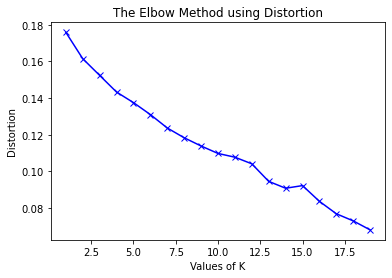

In [20]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

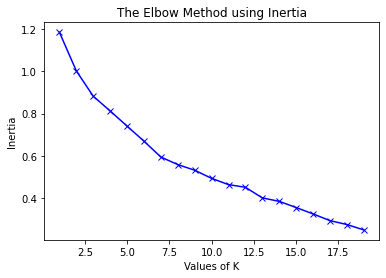

In [21]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [22]:
kclusters = 4

spain_grouped_clustering = spain_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(spain_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([2, 2, 0, 2, 1, 0, 0, 3, 2, 3, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 3, 2, 1, 0, 2, 0, 0], dtype=int32)

In [23]:
cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

spain_merged = df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
spain_merged = spain_merged.join(cities_venues_sorted.set_index('City'), on='City')

spain_merged

,City,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Madrid,"María de Molina 20, Madrid",40.437680,-3.686744,1,Spanish Restaurant,Hotel,Japanese Restaurant,Coffee Shop,Restaurant,Mediterranean Restaurant,Breakfast Spot,Lounge,Spa,Café
1,Valencia,"Martínez Cubells 4, Valencia",39.468176,-0.374816,1,Restaurant,Hotel,Clothing Store,Coffee Shop,Spanish Restaurant,Mediterranean Restaurant,Breakfast Spot,Italian Restaurant,Cosmetics Shop,Theater
2,Zaragoza,"San Miguel 7, Zaragoza",41.651058,-0.880645,0,Spanish Restaurant,Tapas Restaurant,Plaza,Gastropub,Bistro,Café,Japanese Restaurant,Pizza Place,Mexican Restaurant,Brewery
3,Alicante,"Pablo Iglesias 5, Alicante",38.347451,-0.488203,2,Restaurant,Pub,Spanish Restaurant,Burger Joint,Italian Restaurant,Tapas Restaurant,Café,Coffee Shop,Hotel,Mediterranean Restaurant
4,Barcelona,"Sant Joan 58, Barcelona",41.396366,2.174007,1,Hotel,Coffee Shop,Spanish Restaurant,Korean Restaurant,Asian Restaurant,Tapas Restaurant,Bistro,Café,Bed & Breakfast,Chinese Restaurant
5,Sevilla,"República Argentina 26, Sevilla",37.378055,-6.002107,0,Spanish Restaurant,Restaurant,Tapas Restaurant,Pizza Place,Seafood Restaurant,Gastropub,Supermarket,Bookstore,Fast Food Restaurant,Coffee Shop
6,Murcia,"Gran Vía Alfonso X el Sabio 7, Murcia",37.989098,-1.130234,2,Coffee Shop,Tapas Restaurant,Restaurant,Theater,Plaza,Pizza Place,Café,Spanish Restaurant,Mediterranean Restaurant,Nightclub
7,Málaga,"Centro Comercial Málaga Plaza, Málaga",36.718198,-4.428929,1,Hotel,Spanish Restaurant,Café,Coffee Shop,Italian Restaurant,Burger Joint,Department Store,Restaurant,Grocery Store,Plaza
8,Almería,"Rambla Obispo Orberá 11, Almería",36.841152,-2.462713,0,Tapas Restaurant,Spanish Restaurant,Pub,Restaurant,Café,Hotel,Tea Room,Plaza,Coffee Shop,Cocktail Bar
9,Salamanca,"Correhuela 18, Salamanca",40.965090,-5.661362,0,Tapas Restaurant,Pub,Spanish Restaurant,Wine Bar,Gastropub,Plaza,Cocktail Bar,Irish Pub,Japanese Restaurant,Gourmet Shop


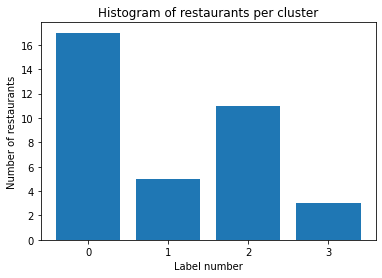

In [41]:
labels, counts = np.unique(spain_merged['Cluster Labels'], return_counts=True)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)

plt.title('Histogram of restaurants per cluster') # add a title to the histogram
plt.ylabel('Number of restaurants') # add y-label
plt.xlabel('Label number') # add x-label

plt.show()

In [ ]:
label0 = spain_merged.loc[spain_merged['Cluster Labels'] == 0, spain_merged.columns[[1] + list(range(5, spain_merged.shape[1]))]]
label0.shape

In [38]:
label1 = spain_merged.loc[spain_merged['Cluster Labels'] == 1, spain_merged.columns[[1] + list(range(5, spain_merged.shape[1]))]]
label1.shape

(5, 11)

In [39]:
label2 = spain_merged.loc[spain_merged['Cluster Labels'] == 2, spain_merged.columns[[1] + list(range(5, spain_merged.shape[1]))]]
label2.shape

(11, 11)

In [42]:
label3 = spain_merged.loc[spain_merged['Cluster Labels'] == 3, spain_merged.columns[[1] + list(range(5, spain_merged.shape[1]))]]
label3.shape

(3, 11)